# DeepLearning project with Tensorflow and MNIST
My goal is to implement a model with as few layers and units as possible. Instead of overload the model I try to make it precise in a smart way, by using optimize techniques and different layer types, as well matching the compile settings. In the end I will compare my model with an overloaded model with a similar accuracy to see the performance differences.

## Data Analysis

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import math
import matplotlib.colors as mcolors
from keras import layers
import seaborn as sn

Here are some settings for the models, so that they have the same conditions.

In [7]:
batch_size = 32
epochs = 10

train set size:  60000  | test set size:  10000


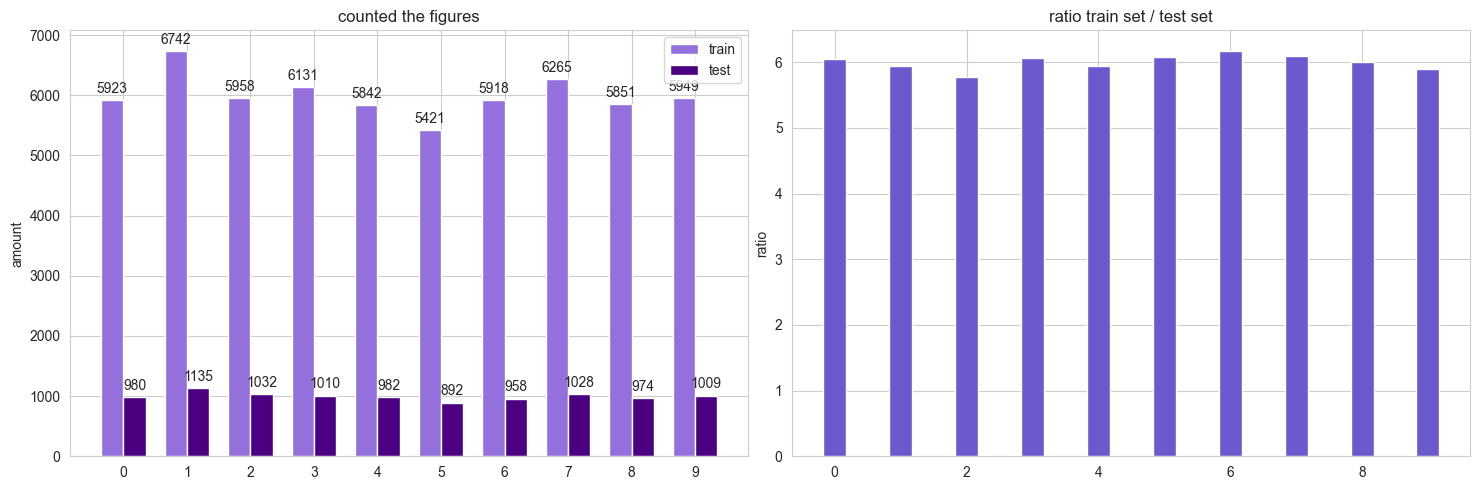

In [8]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

figure_train, count_train = np.unique(y_train, return_counts=True)
figure_test, count_test = np.unique(y_test, return_counts=True)
ratio = count_train/count_test
labels = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
size_train = y_train.size
size_test = y_test.size
print("train set size: ", size_train, " | test set size: ", size_test)

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(1,2, figsize=(15, 5))
rects1 = ax[0].bar(x - width/2, count_train, width, label='train', color='mediumpurple')
rects2 = ax[0].bar(x + width/2, count_test, width, label='test', color='indigo')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax[0].set_ylabel('amount')
ax[0].set_title('counted the figures')
ax[0].set_xticks(x, labels)
ax[0].legend()

ax[0].bar_label(rects1, padding=3)
ax[0].bar_label(rects2, padding=3)

fig.tight_layout()

ax[1].bar(x, ratio, width, label='train', color='slateblue')
ax[1].set_ylabel('ratio')
ax[1].set_title('ratio train set / test set')

plt.show()

Here you can see the distribution of the figures. They are not evenly distributed. In the training set (in blue) 1's are the most with 6742 and 5's are fewest with 5421. The test set is shown in orange. Let's have a loot at the ratios. To do so, the amount of train figures is divided by the amount of test figures.

You can see the ratios are around 6, like expected because there are 60000 train and 10000 test figures. The conclusion is that the distribution of the figure amounts of both sets are very similar.


 Plot of the first 10 samples in the MNIST training set


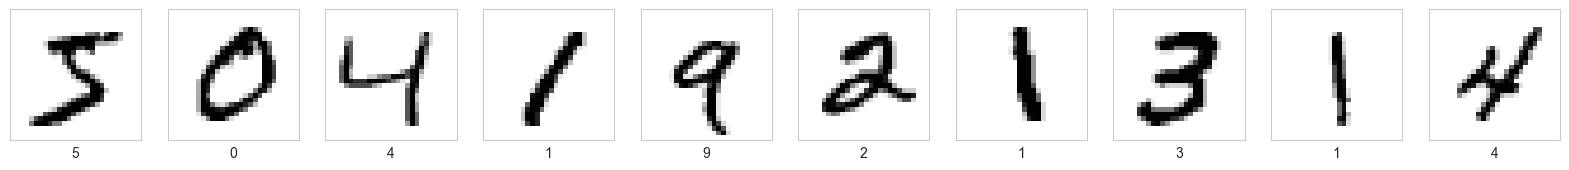

In [9]:
print('\n Plot of the first 10 samples in the MNIST training set')
plt.figure(figsize=(20,10))
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(y_train[i])
plt.show()

## Explainability


Starting with this basic model for reference. It includes just an input layer with 28 x 28 values and a dense (output) layer with 10 units. For comparability, these layers are gone be the same for the following models and this is the basic reference model to discuss changes.

In [10]:
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

In [12]:
model_ref = tf.keras.models.Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(10, activation=tf.nn.softmax)
])

model_ref.compile(
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

history_ref = model_ref.fit(
    x=x_train,
    y=y_train,
    batch_size=batch_size,
    epochs=epochs,
    validation_data=(x_test,y_test),
)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5577 - accuracy: 0.8651 - val_loss: 0.3421 - val_accuracy: 0.9074
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3322 - accuracy: 0.9063 - val_loss: 0.3105 - val_accuracy: 0.9151
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3103 - accuracy: 0.9134 - val_loss: 0.3004 - val_accuracy: 0.9176
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2991 - accuracy: 0.9164 - val_loss: 0.3000 - val_accuracy: 0.9187
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2930 - accuracy: 0.9195 - val_loss: 0.2969 - val_accuracy: 0.9197
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2895 - accuracy: 0.9204 - val_loss: 0.2955 - val_accuracy: 0.9221
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2865 - accuracy: 0.9219 - val_loss: 0.2959 - val_accuracy:

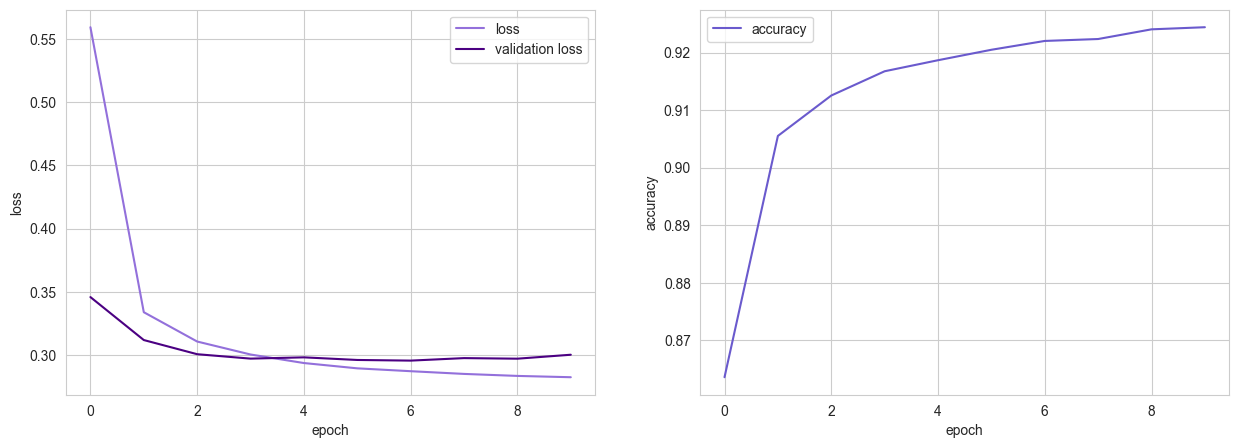

In [42]:
fig, axs = plt.subplots(1,2, figsize=(15, 5))

axs[0].plot(history_ref.history["loss"], color='mediumpurple')
axs[0].plot(history_ref.history["val_loss"], color='indigo')
# axs[0].ylabel("loss")
# axs[0].xlabel("epoch")
# axs[0].title("model loss")
axs[0].legend(["loss", "validation loss"], loc="best")
axs[0].set_xlabel('epoch')
axs[0].set_ylabel('loss')


axs[1].plot(history_ref.history["accuracy"], color='slateblue')
# axs[1].xlabel("epoch")
# axs[1].title("model accuracy")
axs[1].legend(["accuracy"], loc="best")
axs[1].set_xlabel('epoch')
axs[1].set_ylabel('accuracy')

plt.show()

This graph on the left is showing the loss of the test set and the loss of the validation set. On the right you can see the accuracy of the model.
The next models are keras core layers.

In [14]:
model_dense = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

model_dense.compile(
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

print("\nStarting to train model with dense layer")
history_dense = model_dense.fit(
    x=x_train,
    y=y_train,
    batch_size=batch_size,
    epochs=epochs,
    validation_data=(x_test,y_test),
)


Starting to train model with dense layer
Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5296 - accuracy: 0.8603 - val_loss: 0.3190 - val_accuracy: 0.9098
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3098 - accuracy: 0.9124 - val_loss: 0.2893 - val_accuracy: 0.9197
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2908 - accuracy: 0.9179 - val_loss: 0.2854 - val_accuracy: 0.9206
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2815 - accuracy: 0.9209 - val_loss: 0.2802 - val_accuracy: 0.9235
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2763 - accuracy: 0.9230 - val_loss: 0.2821 - val_accuracy: 0.9219
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2720 - accuracy: 0.9243 - val_loss: 0.2782 - val_accuracy: 0.9236
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2685 - accuracy:

In [15]:
model_activation = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

model_activation.compile(
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

print("\nStarting to train model with activation layer")
history_activation = model_activation.fit(
    x=x_train,
    y=y_train,
    batch_size=batch_size,
    epochs=epochs,
    validation_data=(x_test,y_test),
)


Starting to train model with activation layer
Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5553 - accuracy: 0.8667 - val_loss: 0.3425 - val_accuracy: 0.9077
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3326 - accuracy: 0.9062 - val_loss: 0.3107 - val_accuracy: 0.9150
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3100 - accuracy: 0.9130 - val_loss: 0.3035 - val_accuracy: 0.9181
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2996 - accuracy: 0.9162 - val_loss: 0.2984 - val_accuracy: 0.9194
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2938 - accuracy: 0.9192 - val_loss: 0.2951 - val_accuracy: 0.9209
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2896 - accuracy: 0.9205 - val_loss: 0.2958 - val_accuracy: 0.9211
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2871 - accu

In [16]:
model_conv2D  = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), input_shape=(28, 28, 1)),
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(10, activation='softmax')
])

model_conv2D.compile(
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

print("\nStarting to train model with Convolutional layer")
history_conv2D = model_conv2D.fit(
    x=x_train,
    y=y_train,
    batch_size=batch_size,
    epochs=epochs,
    validation_data=(x_test,y_test),
)


Starting to train model with Convolutional layer
Epoch 1/10
1875/1875 [==============================] - 20s 10ms/step - loss: 0.3523 - accuracy: 0.8978 - val_loss: 0.2937 - val_accuracy: 0.9164
Epoch 2/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.2970 - accuracy: 0.9153 - val_loss: 0.2987 - val_accuracy: 0.9162
Epoch 3/10
1875/1875 [==============================] - 18s 10ms/step - loss: 0.2835 - accuracy: 0.9208 - val_loss: 0.2813 - val_accuracy: 0.9204
Epoch 4/10
1875/1875 [==============================] - 18s 10ms/step - loss: 0.2752 - accuracy: 0.9225 - val_loss: 0.2872 - val_accuracy: 0.9194
Epoch 5/10
1875/1875 [==============================] - 18s 10ms/step - loss: 0.2694 - accuracy: 0.9246 - val_loss: 0.2840 - val_accuracy: 0.9202
Epoch 6/10
1875/1875 [==============================] - 18s 10ms/step - loss: 0.2659 - accuracy: 0.9247 - val_loss: 0.2803 - val_accuracy: 0.9205
Epoch 7/10
1875/1875 [==============================] - 18s 10ms/step - lo

In [17]:
model_lambda = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Lambda(lambda x: x ** 2),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

model_lambda.compile(
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

print("\nStarting to train model with lambda layer")
history_lambda = model_lambda.fit(
    x=x_train,
    y=y_train,
    batch_size=batch_size,
    epochs=epochs,
    validation_data=(x_test,y_test),
)


Starting to train model with lambda layer
Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.8300 - accuracy: 0.8293 - val_loss: 0.4698 - val_accuracy: 0.8765
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4307 - accuracy: 0.8806 - val_loss: 0.3911 - val_accuracy: 0.8959
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3838 - accuracy: 0.8927 - val_loss: 0.3672 - val_accuracy: 0.9012
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3649 - accuracy: 0.8984 - val_loss: 0.3577 - val_accuracy: 0.9053
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3549 - accuracy: 0.9016 - val_loss: 0.3519 - val_accuracy: 0.9078
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3488 - accuracy: 0.9040 - val_loss: 0.3491 - val_accuracy: 0.9085
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3448 - accuracy

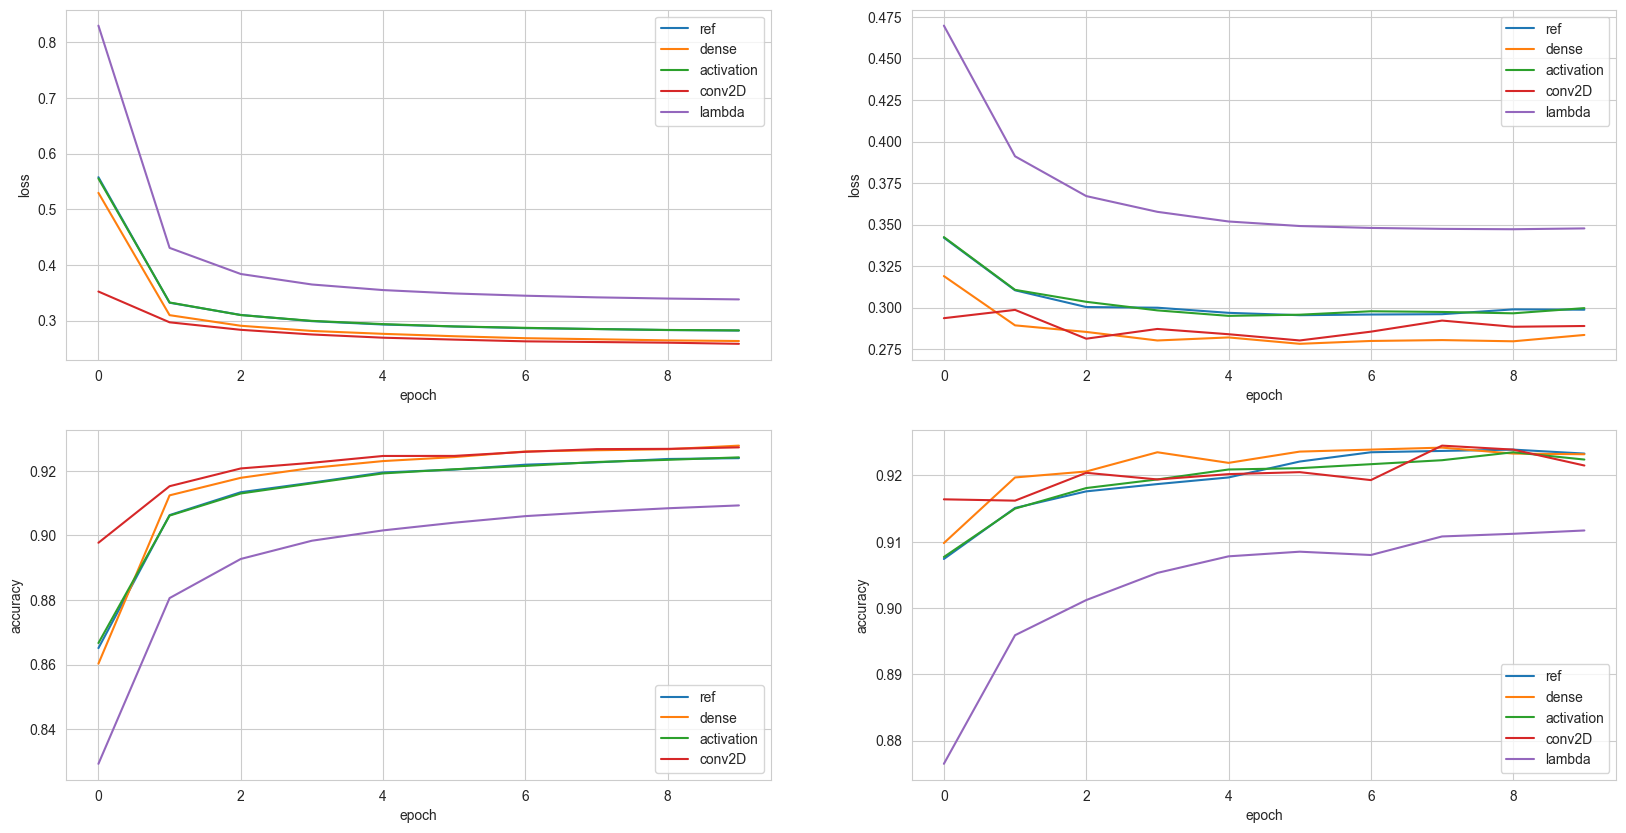

In [18]:
fig, axs = plt.subplots(2,2, figsize=(20, 10))

axs[0,0].plot(history_ref.history["loss"])
axs[0,0].plot(history_dense.history["loss"])
axs[0,0].plot(history_activation.history["loss"])
axs[0,0].plot(history_conv2D.history["loss"])
axs[0,0].plot(history_lambda.history["loss"])

axs[0,0].legend(["ref", "dense", "activation", "conv2D", "lambda"], loc="best")
axs[0,0].set_xlabel('epoch')
axs[0,0].set_ylabel('loss')


axs[0,1].plot(history_ref.history["val_loss"])
axs[0,1].plot(history_dense.history["val_loss"])
axs[0,1].plot(history_activation.history["val_loss"])
axs[0,1].plot(history_conv2D.history["val_loss"])
axs[0,1].plot(history_lambda.history["val_loss"])


axs[0,1].legend(["ref", "dense", "activation", "conv2D", "lambda"], loc="best")
axs[0,1].set_xlabel('epoch')
axs[0,1].set_ylabel('loss')


axs[1,0].plot(history_ref.history["accuracy"])
axs[1,0].plot(history_dense.history["accuracy"])
axs[1,0].plot(history_activation.history["accuracy"])
axs[1,0].plot(history_conv2D.history["accuracy"])
axs[1,0].plot(history_lambda.history["accuracy"])


axs[1,0].legend(["ref", "dense", "activation", "conv2D"], loc="best")
axs[1,0].set_xlabel('epoch')
axs[1,0].set_ylabel('accuracy')


axs[1,1].plot(history_ref.history["val_accuracy"])
axs[1,1].plot(history_dense.history["val_accuracy"])
axs[1,1].plot(history_activation.history["val_accuracy"])
axs[1,1].plot(history_conv2D.history["val_accuracy"])
axs[1,1].plot(history_lambda.history["val_accuracy"])

axs[1,1].legend(["ref", "dense", "activation", "conv2D", "lambda"], loc="best")
axs[1,1].set_xlabel('epoch')
axs[1,1].set_ylabel('accuracy')

plt.show()

We can see the layers behave different, especially the dense layer. Just this one 10 unit dense layer is improving the model decisive. It seems like the other ones do not have a noticeable influence at all. Let's take a look at each layer and try to understand them.

**Dense layer**: The first parameter amount of units (10) and the input size are telling the system how the weight matrix should be created. At the same time this is the output size of this layer. In this way as an output layer (like in the base model) the highest value can be taken as prediction.

**Activation layer**: This layer applies an activation function to an output. In this case the 'relu' function, which just converts all negative input values into 0's and leaves the others as usual. In the MNIST data set are no negative values, so it is clear that this layer does not have a noticeable impact.

**Convolutional layer**: Different to the dense layer this layer is not working on pixel level. It can recognize patterns like lines or areas. This behaviour is interesting for image recognition. In the plots the model with a convolutional layer got the best results for the training set. The recognition is done by chopping the pixel level down with a filter, so a specific composition of pixels, results in a certain type of new structure. In this way circles, lines or curves can be specifically recognized. This layer property is practical for image recognition because the network learns not only on the pixel level, but on a higher structure layer.

**Lambda layer**: The lambda layer can be used to specify an additional operation to the model. In this case the input values are getting squared. Unfortunately this does not improve the network. With the square function included the model puts out the worst results.

The conclusion is to focus on the dense and convolutional layers. The dense layer because it puts out the best results in matter of the test set and the convolutional layer because of the good results of the training set.

In [19]:
model_1  = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), input_shape=(28, 28, 1)),
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(10, activation='softmax')
])

model_1.compile(
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

print("\nStarting to train model 1")
history_1 = model_1.fit(
    x=x_train,
    y=y_train,
    batch_size=batch_size,
    epochs=epochs,
    validation_data=(x_test,y_test),
)


Starting to train model 1
Epoch 1/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.3871 - accuracy: 0.8863 - val_loss: 0.3223 - val_accuracy: 0.9112
Epoch 2/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.3028 - accuracy: 0.9125 - val_loss: 0.3072 - val_accuracy: 0.9106
Epoch 3/10
1875/1875 [==============================] - 18s 10ms/step - loss: 0.2869 - accuracy: 0.9176 - val_loss: 0.2887 - val_accuracy: 0.9184
Epoch 4/10
1875/1875 [==============================] - 18s 10ms/step - loss: 0.2767 - accuracy: 0.9218 - val_loss: 0.2893 - val_accuracy: 0.9209
Epoch 5/10
1875/1875 [==============================] - 18s 10ms/step - loss: 0.2717 - accuracy: 0.9230 - val_loss: 0.2914 - val_accuracy: 0.9175
Epoch 6/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.2663 - accuracy: 0.9258 - val_loss: 0.2782 - val_accuracy: 0.9211
Epoch 7/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.2627 - accuracy: 

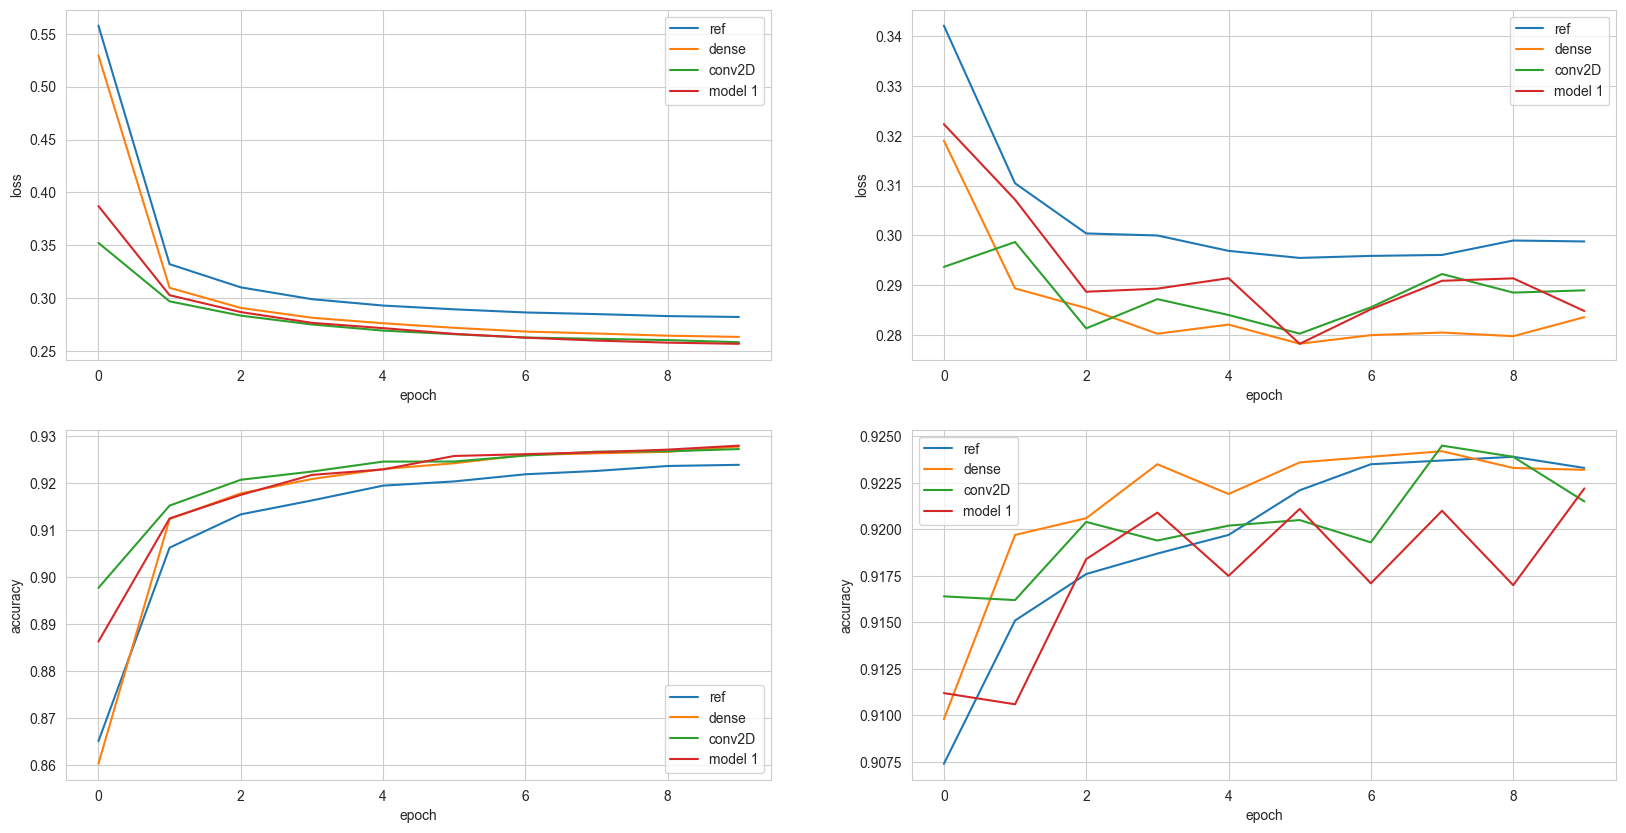

In [20]:
fig, axs = plt.subplots(2,2, figsize=(20, 10))

axs[0,0].plot(history_ref.history["loss"])
axs[0,0].plot(history_dense.history["loss"])
axs[0,0].plot(history_conv2D.history["loss"])
axs[0,0].plot(history_1.history["loss"])

axs[0,0].legend(["ref", "dense", "conv2D", "model 1"], loc="best")
axs[0,0].set_xlabel('epoch')
axs[0,0].set_ylabel('loss')


axs[0,1].plot(history_ref.history["val_loss"])
axs[0,1].plot(history_dense.history["val_loss"])
axs[0,1].plot(history_conv2D.history["val_loss"])
axs[0,1].plot(history_1.history["val_loss"])

axs[0,1].legend(["ref", "dense", "conv2D", "model 1"], loc="best")
axs[0,1].set_xlabel('epoch')
axs[0,1].set_ylabel('loss')


axs[1,0].plot(history_ref.history["accuracy"])
axs[1,0].plot(history_dense.history["accuracy"])
axs[1,0].plot(history_conv2D.history["accuracy"])
axs[1,0].plot(history_1.history["accuracy"])

axs[1,0].legend(["ref", "dense", "conv2D", "model 1"], loc="best")
axs[1,0].set_xlabel('epoch')
axs[1,0].set_ylabel('accuracy')


axs[1,1].plot(history_ref.history["val_accuracy"])
axs[1,1].plot(history_dense.history["val_accuracy"])
axs[1,1].plot(history_conv2D.history["val_accuracy"])
axs[1,1].plot(history_1.history["val_accuracy"])

axs[1,1].legend(["ref", "dense", "conv2D", "model 1"], loc="best")
axs[1,1].set_xlabel('epoch')
axs[1,1].set_ylabel('accuracy')

plt.show()

This result is sobering. The combination is not even better than the layer convolutional itself. Before adding new layers of the same kind or expand the existing layers, a new feature is included into the model, maxpolling. This layer pools the pixels together, so the strongest features are getting summarized in a new sized matrix. This layer works especially with the convolutional layer very good together. Because the first layer is putting out some structures and the second layer puts out the most prominent points.

In [21]:
model_2  = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(10, activation='softmax')
])

model_2.compile(
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

print("\nStarting to train model 2")
history_2 = model_2.fit(
    x=x_train,
    y=y_train,
    batch_size=batch_size,
    epochs=epochs,
    validation_data=(x_test,y_test),
)


Starting to train model 2
Epoch 1/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.3370 - accuracy: 0.9031 - val_loss: 0.2086 - val_accuracy: 0.9412
Epoch 2/10
1875/1875 [==============================] - 16s 9ms/step - loss: 0.1721 - accuracy: 0.9502 - val_loss: 0.1496 - val_accuracy: 0.9569
Epoch 3/10
1875/1875 [==============================] - 16s 9ms/step - loss: 0.1246 - accuracy: 0.9642 - val_loss: 0.1157 - val_accuracy: 0.9666
Epoch 4/10
1875/1875 [==============================] - 16s 9ms/step - loss: 0.1000 - accuracy: 0.9705 - val_loss: 0.1040 - val_accuracy: 0.9691
Epoch 5/10
1875/1875 [==============================] - 16s 9ms/step - loss: 0.0863 - accuracy: 0.9738 - val_loss: 0.0946 - val_accuracy: 0.9709
Epoch 6/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0779 - accuracy: 0.9767 - val_loss: 0.0883 - val_accuracy: 0.9734
Epoch 7/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0707 - accuracy: 0.9789 

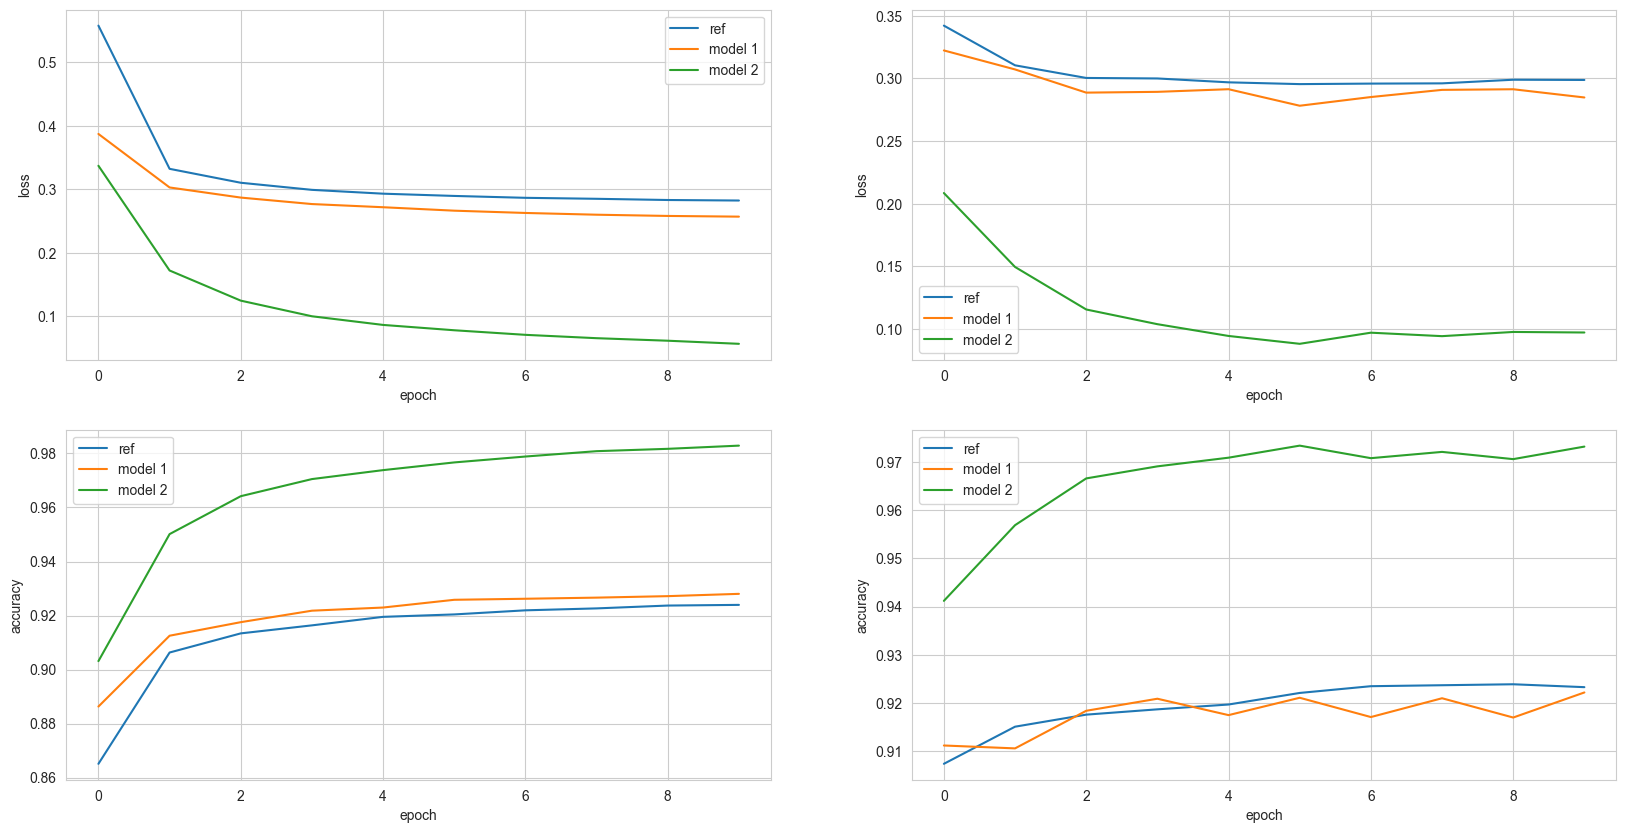

In [22]:
fig, axs = plt.subplots(2,2, figsize=(20, 10))

axs[0,0].plot(history_ref.history["loss"])
axs[0,0].plot(history_1.history["loss"])
axs[0,0].plot(history_2.history["loss"])


axs[0,0].legend(["ref", "model 1", "model 2"], loc="best")
axs[0,0].set_xlabel('epoch')
axs[0,0].set_ylabel('loss')


axs[0,1].plot(history_ref.history["val_loss"])
axs[0,1].plot(history_1.history["val_loss"])
axs[0,1].plot(history_2.history["val_loss"])


axs[0,1].legend(["ref", "model 1", "model 2"], loc="best")
axs[0,1].set_xlabel('epoch')
axs[0,1].set_ylabel('loss')


axs[1,0].plot(history_ref.history["accuracy"])
axs[1,0].plot(history_1.history["accuracy"])
axs[1,0].plot(history_2.history["accuracy"])

axs[1,0].legend(["ref", "model 1", "model 2"], loc="best")
axs[1,0].set_xlabel('epoch')
axs[1,0].set_ylabel('accuracy')


axs[1,1].plot(history_ref.history["val_accuracy"])
axs[1,1].plot(history_1.history["val_accuracy"])
axs[1,1].plot(history_2.history["val_accuracy"])

axs[1,1].legend(["ref", "model 1", "model 2"], loc="best")
axs[1,1].set_xlabel('epoch')
axs[1,1].set_ylabel('accuracy')

plt.show()

This looks promising. The model 2 with the maxpolling layer performs better in every case. Next step is to optimize the existing model. To get more accuracy the model should train for more epochs, with a higher learning rate and beacause this takes time with a higher batch size as well.

In [23]:
print("\nStarting to train model 2")
model_2.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

history_2_2 = model_2.fit(
    x=x_train,
    y=y_train,
    batch_size=512,
    epochs=20,
    validation_data=(x_test,y_test),
)


Starting to train model 2
Epoch 1/20
118/118 [==============================] - 12s 96ms/step - loss: 0.0858 - accuracy: 0.9738 - val_loss: 0.1038 - val_accuracy: 0.9697
Epoch 2/20
118/118 [==============================] - 11s 92ms/step - loss: 0.0672 - accuracy: 0.9787 - val_loss: 0.1126 - val_accuracy: 0.9684
Epoch 3/20
118/118 [==============================] - 11s 92ms/step - loss: 0.0629 - accuracy: 0.9790 - val_loss: 0.1106 - val_accuracy: 0.9696
Epoch 4/20
118/118 [==============================] - 11s 92ms/step - loss: 0.0501 - accuracy: 0.9842 - val_loss: 0.1097 - val_accuracy: 0.9707
Epoch 5/20
118/118 [==============================] - 11s 92ms/step - loss: 0.0488 - accuracy: 0.9840 - val_loss: 0.1087 - val_accuracy: 0.9705
Epoch 6/20
118/118 [==============================] - 11s 92ms/step - loss: 0.0469 - accuracy: 0.9843 - val_loss: 0.1431 - val_accuracy: 0.9656
Epoch 7/20
118/118 [==============================] - 11s 93ms/step - loss: 0.0485 - accuracy: 0.9843 - val_l

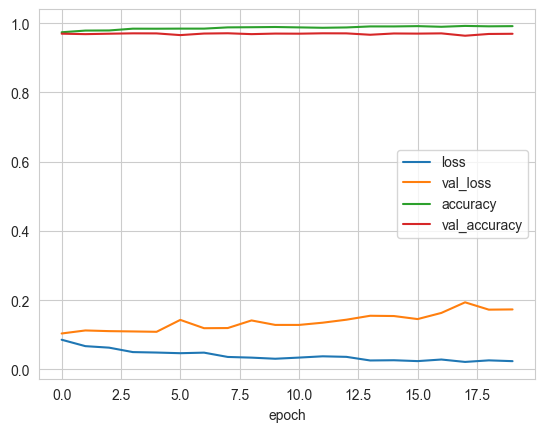

In [24]:
plt.plot(history_2_2.history["loss"])
plt.plot(history_2_2.history["val_loss"])
plt.plot(history_2_2.history["accuracy"])
plt.plot(history_2_2.history["val_accuracy"])

plt.xlabel("epoch")
# plt.title("model loss")
plt.legend(["loss", "val_loss", "accuracy", "val_accuracy"], loc="best")
plt.show()

In this way the model got an accuracy of over 99%. But the model is overfitting, the test set is drifting away. With the experience from tutorial 1.2 (optimization) and 1.3 (regularization) the following model should do better. It got a regulator to prevent the overfitting. The dense layer increased by sice to achieve a good accuracy.

In [25]:
model_3  = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1), kernel_regularizer=tf.keras.regularizers.l2(0.0005)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model_3.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

print("\nStarting to train model 3")
history_3 = model_3.fit(
    x=x_train,
    y=y_train,
    batch_size=64,
    epochs=10,
    validation_data=(x_test,y_test),
)


Starting to train model 3
Epoch 1/10
938/938 [==============================] - 19s 20ms/step - loss: 0.2799 - accuracy: 0.9210 - val_loss: 0.1269 - val_accuracy: 0.9647
Epoch 2/10
938/938 [==============================] - 19s 20ms/step - loss: 0.1058 - accuracy: 0.9698 - val_loss: 0.0968 - val_accuracy: 0.9711
Epoch 3/10
938/938 [==============================] - 18s 20ms/step - loss: 0.0750 - accuracy: 0.9797 - val_loss: 0.0728 - val_accuracy: 0.9788
Epoch 4/10
938/938 [==============================] - 19s 20ms/step - loss: 0.0591 - accuracy: 0.9849 - val_loss: 0.0699 - val_accuracy: 0.9789
Epoch 5/10
938/938 [==============================] - 19s 20ms/step - loss: 0.0499 - accuracy: 0.9873 - val_loss: 0.0693 - val_accuracy: 0.9796
Epoch 6/10
938/938 [==============================] - 19s 20ms/step - loss: 0.0429 - accuracy: 0.9892 - val_loss: 0.0683 - val_accuracy: 0.9809
Epoch 7/10
938/938 [==============================] - 19s 20ms/step - loss: 0.0365 - accuracy: 0.9911 - val_l

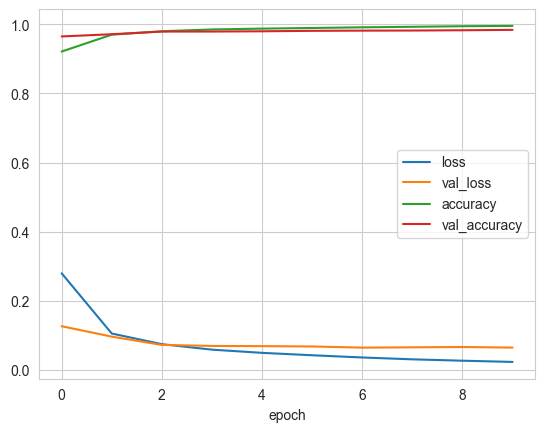

In [26]:
plt.plot(history_3.history["loss"])
plt.plot(history_3.history["val_loss"])
plt.plot(history_3.history["accuracy"])
plt.plot(history_3.history["val_accuracy"])

plt.xlabel("epoch")
# plt.title("model loss")
plt.legend(["loss", "val_loss", "accuracy", "val_accuracy"], loc="best")
plt.show()

## Performance

This model seems good enough, with an accuracy of over 99% and a validation accuracy of 98% it got already a good performance.

313/313 [==============================] - 1s 4ms/step


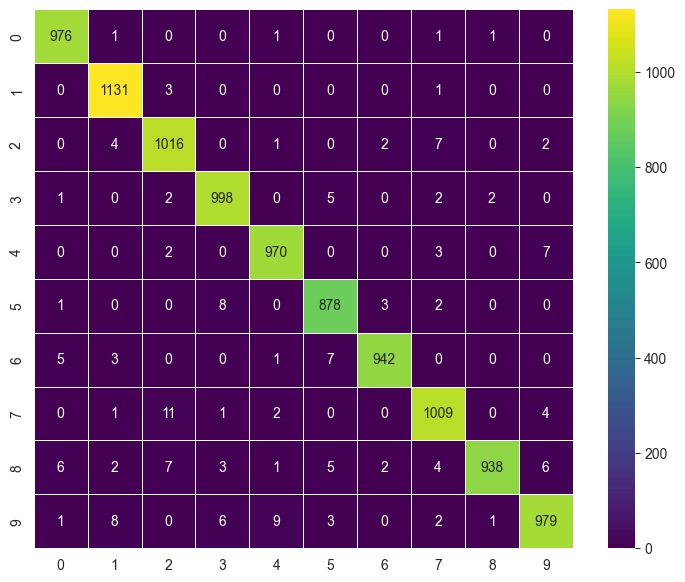

In [27]:
predictions = model_3.predict([x_test])
predictions = np.argmax(predictions, axis=1)

confusion_matrix = tf.math.confusion_matrix(y_test, predictions)

f, ax = plt.subplots(figsize=(9, 7))
sn.heatmap(
    confusion_matrix,
    annot=True,
    linewidths=.7,
    fmt="d",
    square=True,
    ax=ax,
    cmap="viridis",
)

plt.show()

# Literature and sources
[1] https://keras.io/
[2] https://www.tensorflow.org/
[3] https://blog.paperspace.com/working-with-the-lambda-layer-in-keras/
[4] https://medium.com/analytics-vidhya/image-augmentation-using-keras-99072b490c72
[5] https://towardsdatascience.com/going-beyond-99-mnist-handwritten-digits-recognition-cfff96337392
